In [1]:
from __future__ import division 
import pymc3 as pm ;import matplotlib.pyplot as plt
import seaborn as sns ; from theano import tensor as tt
import numpy as np ; import scipy as sp ; import pandas as pd; import os 
import theano as T; from scipy.stats import gamma
plt.style.use("classic")

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
from numpy import pi, log
def FechKal(ar39, time):
    da2 = []
    # Start by calculating the fractional release
    t = np.cumsum(ar39)
    t_c = np.cumsum(time)
    diff_t = t_c[1:-1] - t_c[0:-2]
    f = t/t[-1]
    da2_a = np.zeros([len(ar39)])
    da2_a[0] = ((f[0]**2 - 0**2))*pi/(36*(t_c[0]))
    
    # All other steps for equation 1 
    da2_a[1:-1] = ((f[1:-1]**2 - (f[0:-2])**2)*pi/(36*(diff_t)))
    
    # Equation 2
    da2_b = np.zeros([len(ar39)])
    dif_f = f[1:-1] - f[0:-2]
    da2_b[1:-1] = (1/((pi**2)*diff_t))*(-(pi*pi/3)*dif_f -
                                             (2*pi)*(np.sqrt(1 -(pi/3)*f[1:-1]) - np.sqrt(1 - (pi/3)*f[0:-2])))
    
    # Equation 3
    da2_c = np.zeros([len(ar39)])
    da2_c[1:-1] = (1/(pi*pi*diff_t)*log((1-f[0:-2])/(1 - f[1:-1])))
    
    # Need to decide which to use 
    # > 0 and <= 0.1 - a
    # > 0.1 and <= 0.9 - b
    # >0.9 and <=1 - c
    a = da2_a[(da2_a < 0.1) & (da2_a >0)]
    b = da2_b[(da2_b >= 0.1) & (da2_b <= 0.9)]
    c = da2_c[(da2_c > 0.9) & (da2_c <= 1)]
    
    # put all the values into an array 
    
    da2.extend(a)
    da2.extend(b)
    da2.extend(c)
    
    return da2

In [3]:
# Import Cassata Fish Canyon

'''
Comparison with Frequentist Misfit statistical Method 
Model Test against known 
2-Domain model 
d1 = 0.75, d2 = 0.25
'''
cwd = os.getcwd()
os.chdir("/Users/jackcarter/Documents/Data_Mixtures")
df2 = pd.read_csv("Cassata_FCs2.csv", engine = 'python')
q = df2.as_matrix(columns = None)


In [4]:
temp  = df2['Temp'].values
time = df2['Time'].values
ar39 = df2['Ar39'].values
dr2 = FechKal(ar39, time)
tplot = 1e4/(temp + 273.15)

In [5]:
# Fractional Release
def frel(x): 
    g = np.cumsum(x)
    y = g/(g.max())
    return y

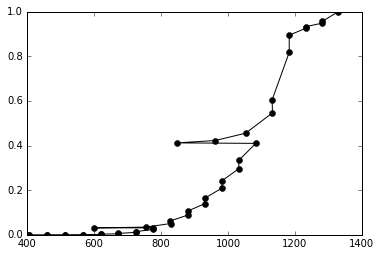

In [6]:
plt.plot(temp, frel(ar39), 'ok-')

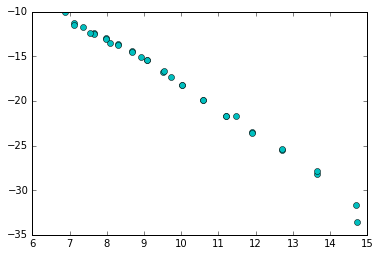

In [14]:
plt.plot(tplot[:len(dr2)][:-5], np.log(dr2[:-5]), 'oc')